In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [2]:
# Parameter
xname = r"$h$"
xname_hat = r"$\hat{h}$"
xname_true = r"$h_\mathrm{true}$"
x_true = 0.6732
x_lim = 0.01

# 2024_04_15_Wilks_varying_wcdm_0.12011_h_0.6732
omega_0 = 0.12011
x_hat_0 = np.array([6.706385e-01 , 6.723878e-01 , 6.703308e-01 , 6.720888e-01 , 6.762800e-01 , 6.748026e-01 , 6.729773e-01 , 6.726574e-01 , 6.756834e-01 , 6.717672e-01 , 6.761070e-01 , 6.731770e-01 , 6.773969e-01 , 6.698053e-01 , 6.761494e-01 , 6.695672e-01 , 6.718779e-01 , 6.716889e-01 , 6.760802e-01 , 6.746739e-01 , 6.712344e-01 , 6.748175e-01 , 6.708721e-01 , 6.762475e-01 , 6.736641e-01 , 6.730664e-01 , 6.722233e-01 , 6.720383e-01 , 6.728727e-01 , 6.731142e-01 , 6.737972e-01 , 6.775541e-01 , 6.734095e-01 , 6.727618e-01 , 6.725717e-01 , 6.701376e-01 , 6.752044e-01 , 6.724283e-01 , 6.747526e-01 , 6.720149e-01 , 6.715135e-01 , 6.750782e-01 , 6.754472e-01 , 6.766954e-01 , 6.726086e-01 , 6.716346e-01 , 6.744280e-01 , 6.702376e-01 , 6.724195e-01 , 6.763604e-01 , 6.659677e-01 , 6.756354e-01 , 6.767911e-01 , 6.744353e-01 , 6.737807e-01 , 6.725285e-01 , 6.736155e-01 , 6.727138e-01 , 6.734266e-01 , 6.747244e-01 , 6.716741e-01 , 6.723564e-01 , 6.670615e-01 , 6.748255e-01 , 6.729987e-01 , 6.738061e-01 , 6.716127e-01 , 6.707613e-01 , 6.713648e-01 , 6.709819e-01 , 6.766067e-01 , 6.735731e-01 , 6.745943e-01 , 6.724761e-01 , 6.754700e-01 , 6.759212e-01 , 6.747529e-01 , 6.737742e-01 , 6.718626e-01 , 6.749755e-01 , 6.727688e-01 , 6.759104e-01 , 6.757607e-01 , 6.735407e-01 , 6.697525e-01 , 6.724935e-01 , 6.706559e-01 , 6.719433e-01 , 6.716327e-01 , 6.744023e-01 , 6.723279e-01 , 6.728046e-01 , 6.737684e-01 , 6.722336e-01 , 6.707462e-01 , 6.730697e-01 , 6.731950e-01 , 6.755246e-01 , 6.754033e-01 , 6.784466e-01])
lnL_hat_0 = -np.array([338.41, 302.79, 283.50, 348.39, 306.77, 298.05, 291.84, 303.35, 300.69, 333.81, 303.34, 331.26, 306.31, 334.48, 310.39, 326.23, 292.54, 282.55, 314.01, 300.30, 318.09, 301.03, 274.65, 323.42, 330.64, 338.22, 306.67, 300.79, 290.53, 301.94, 305.97, 304.63, 301.74, 281.84, 304.81, 299.85, 292.44, 285.14, 310.30, 317.24, 305.60, 321.58, 294.19, 299.06, 304.56, 306.85, 330.40, 310.63, 300.33, 308.69, 300.40, 330.80, 281.94, 284.49, 298.26, 304.52, 287.66, 298.11, 312.20, 312.90, 316.30, 306.96, 324.56, 301.49, 289.14, 309.35, 293.62, 286.77, 307.14, 285.96, 311.53, 295.87, 316.20, 312.85, 307.47, 314.51, 298.11, 289.75, 319.37, 270.40, 305.98, 268.48, 306.85, 293.93, 332.96, 323.18, 309.70, 282.39, 324.12, 298.92, 334.06, 321.16, 300.18, 295.37, 308.59, 297.67, 270.30, 300.06, 317.89, 291.78])
lnL_tru_0 = -np.array([339.10, 302.89, 284.35, 348.53, 307.69, 298.30, 291.84, 303.40, 301.35, 334.00, 304.19, 331.27, 308.23, 335.71, 311.26, 327.52, 292.70, 282.80, 314.97, 300.49, 318.50, 301.31, 275.25, 324.45, 330.66, 338.22, 306.76, 300.90, 290.54, 301.95, 306.03, 306.42, 301.75, 281.87, 304.83, 300.80, 292.92, 285.21, 310.57, 317.41, 305.93, 321.97, 294.80, 300.38, 304.61, 307.10, 330.55, 311.56, 300.38, 309.72, 305.94, 331.49, 283.17, 284.63, 298.31, 304.55, 287.67, 298.12, 312.20, 313.11, 316.54, 307.04, 328.46, 301.74, 289.15, 309.40, 293.88, 287.40, 307.55, 286.49, 312.72, 295.89, 316.45, 312.89, 307.94, 315.30, 298.31, 289.78, 319.59, 270.76, 305.98, 269.26, 307.50, 293.94, 334.24, 323.23, 310.45, 282.54, 324.33, 299.05, 334.16, 321.17, 300.22, 295.47, 309.26, 297.68, 270.30, 300.57, 318.39, 294.75])

# 2024_04_16_Wilks_varying_wcdm_0.116_h_0.6732
omega_1 = 0.116
x_hat_1 = np.array([6.712281e-01 , 6.723378e-01 , 6.747850e-01 , 6.759513e-01 , 6.712182e-01 , 6.720018e-01 , 6.748524e-01 , 6.741661e-01 , 6.726017e-01 , 6.696944e-01 , 6.734203e-01 , 6.743060e-01 , 6.700684e-01 , 6.758353e-01 , 6.748390e-01 , 6.754291e-01 , 6.724489e-01 , 6.754159e-01 , 6.710886e-01 , 6.743605e-01 , 6.725126e-01 , 6.726386e-01 , 6.735295e-01 , 6.750556e-01 , 6.724496e-01 , 6.736184e-01 , 6.719291e-01 , 6.703437e-01 , 6.724841e-01 , 6.755303e-01 , 6.745401e-01 , 6.783579e-01 , 6.718586e-01 , 6.714349e-01 , 6.724445e-01 , 6.719448e-01 , 6.729720e-01 , 6.766553e-01 , 6.711465e-01 , 6.705179e-01 , 6.754773e-01 , 6.697180e-01 , 6.727231e-01 , 6.736946e-01 , 6.723475e-01 , 6.723023e-01 , 6.726055e-01 , 6.733816e-01 , 6.720315e-01 , 6.729553e-01 , 6.757245e-01 , 6.719857e-01 , 6.703937e-01 , 6.723720e-01 , 6.702393e-01 , 6.754300e-01 , 6.720897e-01 , 6.756147e-01 , 6.723714e-01 , 6.761818e-01 , 6.739720e-01 , 6.732280e-01 , 6.731315e-01 , 6.751073e-01 , 6.742094e-01 , 6.757442e-01 , 6.728739e-01 , 6.739107e-01 , 6.734451e-01 , 6.751549e-01 , 6.709326e-01 , 6.741283e-01 , 6.714091e-01 , 6.731568e-01 , 6.738403e-01 , 6.705025e-01 , 6.721804e-01 , 6.713752e-01 , 6.722939e-01 , 6.746996e-01 , 6.738397e-01 , 6.706133e-01 , 6.774067e-01 , 6.726490e-01 , 6.730152e-01 , 6.720545e-01 , 6.751139e-01 , 6.737790e-01 , 6.783475e-01 , 6.732233e-01 , 6.732935e-01 , 6.732588e-01 , 6.744921e-01 , 6.688760e-01 , 6.686304e-01 , 6.721001e-01 , 6.766620e-01 , 6.724179e-01 , 6.755901e-01 , 6.719163e-01])
lnL_hat_1 = -np.array([304.56, 293.53, 287.70, 268.14, 312.81, 323.69, 274.40, 319.05, 313.67, 298.85, 312.83, 345.11, 286.19, 302.75, 290.76, 309.14, 304.48, 308.42, 277.75, 318.52, 293.59, 288.18, 286.89, 294.37, 327.93, 305.68, 308.90, 346.12, 259.62, 294.08, 312.07, 307.65, 308.86, 303.81, 335.71, 289.31, 304.19, 296.45, 310.68, 301.34, 303.22, 299.72, 291.74, 279.82, 325.47, 301.08, 293.09, 297.11, 339.43, 310.20, 292.97, 311.49, 304.70, 303.26, 273.09, 337.49, 329.00, 285.93, 330.24, 293.89, 308.80, 320.31, 286.64, 332.90, 305.91, 314.79, 342.69, 345.78, 320.11, 317.74, 288.35, 297.26, 302.56, 292.77, 303.17, 326.82, 307.88, 329.35, 293.93, 320.09, 316.13, 295.00, 292.69, 301.86, 314.10, 293.62, 325.22, 285.24, 317.02, 287.64, 298.92, 324.37, 335.45, 282.35, 304.47, 289.49, 336.20, 289.50, 305.35, 291.44])
lnL_tru_1 = -np.array([304.98, 293.61, 288.00, 268.89, 313.29, 323.86, 274.65, 319.20, 313.71, 300.17, 312.84, 345.23, 287.26, 303.55, 291.03, 309.75, 304.53, 308.89, 278.18, 318.68, 293.64, 288.21, 286.92, 294.71, 328.00, 305.70, 309.04, 346.95, 259.65, 294.60, 312.27, 310.56, 309.02, 304.13, 335.80, 289.44, 304.19, 297.71, 311.18, 302.07, 303.76, 300.98, 291.77, 279.85, 325.54, 301.17, 293.12, 297.11, 339.54, 310.21, 293.74, 311.62, 305.56, 303.32, 273.99, 338.01, 329.10, 286.47, 330.31, 294.83, 308.87, 320.32, 286.64, 333.25, 306.03, 315.44, 342.71, 345.83, 320.13, 318.14, 288.85, 297.39, 302.90, 292.77, 303.21, 327.56, 308.01, 329.70, 294.04, 320.31, 316.19, 295.72, 294.39, 301.90, 314.11, 293.75, 325.61, 285.27, 319.73, 287.64, 298.92, 324.38, 335.61, 284.32, 306.65, 289.62, 337.35, 289.59, 305.98, 291.55])

# 2024_04_21_Wilks_varying_wcdm_0.124_h_0.6732
omega_2 = 0.124
x_hat_2 = np.array([6.770090e-01 , 6.739529e-01 , 6.714798e-01 , 6.752669e-01 , 6.740545e-01 , 6.743138e-01 , 6.742747e-01 , 6.729015e-01 , 6.703007e-01 , 6.695973e-01 , 6.717139e-01 , 6.727875e-01 , 6.712337e-01 , 6.707531e-01 , 6.747373e-01 , 6.745919e-01 , 6.735001e-01 , 6.781571e-01 , 6.704525e-01 , 6.708993e-01 , 6.754519e-01 , 6.714679e-01 , 6.771756e-01 , 6.713494e-01 , 6.735094e-01 , 6.758889e-01 , 6.711811e-01 , 6.721064e-01 , 6.758107e-01 , 6.733023e-01 , 6.735276e-01 , 6.725314e-01 , 6.759567e-01 , 6.721980e-01 , 6.744049e-01 , 6.754954e-01 , 6.741335e-01 , 6.703421e-01 , 6.722700e-01 , 6.718517e-01 , 6.750425e-01 , 6.692799e-01 , 6.765943e-01 , 6.731133e-01 , 6.723370e-01 , 6.737188e-01 , 6.729500e-01 , 6.738514e-01 , 6.759808e-01 , 6.741897e-01 , 6.743366e-01 , 6.743134e-01 , 6.734194e-01 , 6.722649e-01 , 6.698123e-01 , 6.712385e-01 , 6.691315e-01 , 6.717133e-01 , 6.743607e-01 , 6.744886e-01 , 6.733610e-01 , 6.744037e-01 , 6.714773e-01 , 6.760485e-01 , 6.721873e-01 , 6.760052e-01 , 6.786283e-01 , 6.750731e-01 , 6.758499e-01 , 6.747067e-01 , 6.720045e-01 , 6.735555e-01 , 6.743946e-01 , 6.730241e-01 , 6.739606e-01 , 6.756681e-01 , 6.713742e-01 , 6.701613e-01 , 6.669946e-01 , 6.743699e-01 , 6.704261e-01 , 6.783457e-01 , 6.742363e-01 , 6.728770e-01 , 6.764126e-01 , 6.720911e-01 , 6.713271e-01 , 6.757420e-01 , 6.726964e-01 , 6.736097e-01 , 6.742395e-01 , 6.709620e-01 , 6.737907e-01 , 6.738610e-01 , 6.693898e-01 , 6.787815e-01 , 6.728594e-01 , 6.711934e-01 , 6.739853e-01 , 6.747821e-01])
lnL_hat_2 = -np.array([311.13, 326.48, 277.15, 289.77, 303.57, 314.36, 288.31, 309.71, 310.56, 285.36, 315.11, 291.80, 280.22, 298.76, 304.43, 286.26, 296.45, 297.59, 292.90, 287.15, 305.75, 324.03, 326.33, 277.56, 316.19, 280.46, 297.75, 306.04, 300.61, 300.58, 307.65, 310.66, 301.23, 301.76, 323.96, 285.82, 312.92, 300.88, 295.82, 305.13, 299.21, 316.62, 308.28, 291.10, 307.46, 294.42, 296.45, 325.37, 309.16, 289.35, 314.27, 308.62, 306.00, 309.11, 282.59, 291.08, 321.12, 297.39, 291.82, 310.72, 300.29, 316.08, 288.30, 322.14, 317.39, 320.08, 315.40, 314.10, 289.45, 294.57, 339.63, 288.34, 321.50, 305.36, 279.37, 269.13, 337.76, 323.52, 312.21, 287.07, 335.92, 303.21, 306.08, 330.40, 293.31, 295.47, 308.21, 312.11, 293.47, 316.07, 275.37, 285.63, 309.19, 296.63, 313.22, 272.12, 305.63, 301.24, 303.30, 289.86])
lnL_tru_2 = -np.array([312.70, 326.55, 277.50, 290.21, 303.64, 314.47, 288.41, 309.72, 311.41, 286.62, 315.39, 291.82, 280.65, 299.40, 304.71, 286.45, 296.46, 300.24, 293.70, 287.75, 306.25, 324.37, 327.92, 277.90, 316.20, 281.23, 298.25, 306.16, 301.28, 300.59, 307.66, 310.70, 302.06, 301.85, 324.12, 286.34, 313.01, 301.76, 295.94, 305.30, 299.55, 318.17, 309.48, 291.11, 307.63, 294.45, 296.46, 325.40, 309.95, 289.47, 314.43, 308.79, 306.00, 309.20, 283.76, 291.45, 322.77, 297.59, 291.96, 310.89, 300.30, 316.25, 288.66, 322.91, 317.49, 320.80, 318.39, 314.48, 290.24, 294.78, 339.76, 289.50, 321.65, 305.37, 279.46, 269.76, 338.09, 324.49, 316.23, 287.23, 336.70, 305.93, 306.18, 330.42, 294.41, 295.62, 308.56, 312.70, 293.49, 316.09, 275.50, 286.12, 309.21, 296.70, 314.82, 275.15, 305.67, 301.72, 303.38, 290.12])

# Asimov data set 2024_04_21_Wilks_varying_wcdm_asimov_h
xs_asimov   =   np.array([0.667, 0.668, 0.669, 0.670, 0.671, 0.672, 0.6732, 0.674, 0.675, 0.676, 0.677, 0.678, 0.679])
chi2_asimov = 2*np.array([ 4.01,  2.82,  1.84,  1.06,  0.50,  0.15,   0.00,  0.07,  0.33,  0.81,  1.50,  2.40,  3.51])

# Compute likelihood ratio
LR0 = -2*(lnL_tru_0 - lnL_hat_0)
LR1 = -2*(lnL_tru_1 - lnL_hat_1)
LR2 = -2*(lnL_tru_2 - lnL_hat_2)

In [3]:
# histogram settings
bin_width = 0.5
bin_max = 12
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max, bin_width/10.)
N_LR = len(LR0)
nbins = len(bins)
norm = bin_width*N_LR

# x settings
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

In [4]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [5]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

MLE:  0.6732007977294493
1 sigma:  0.002188637276031802


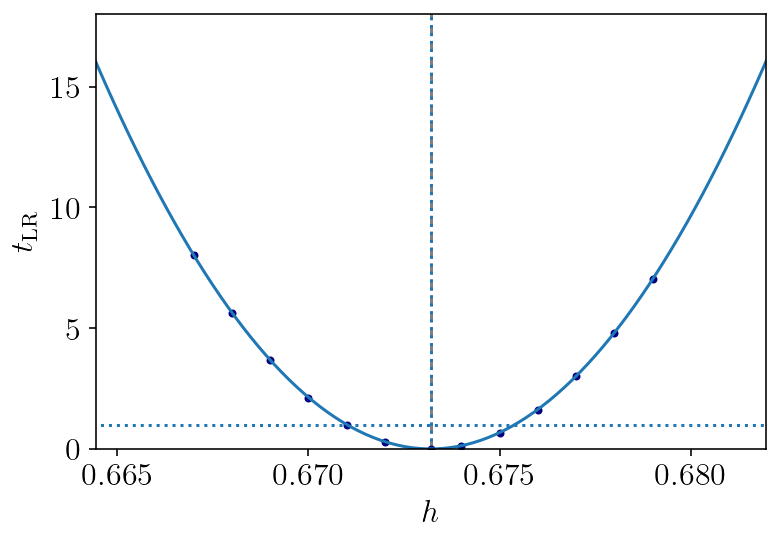

In [6]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, xs_asimov, chi2_asimov, p0=[0.72, 1185714, 0.67], maxfev=30000)
fit_x = x_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("MLE: ", c)
zeros = fsolve(parabola, x0=[-2.,5.])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma

# Set x_lim
x_lim = 4*sigma_asimov

# Plot
plt.plot(xs_asimov, chi2_asimov, marker=".", ls="", color="navy")
plt.plot(fit_x, fit_y, color='tab:blue', ls='-')
plt.vlines(x_true, 0, 25, color="grey", ls="--")
plt.vlines(c, 0, 25, color="tab:blue", ls=":")
plt.hlines(1, 0.65, 0.70, color="tab:blue", ls=":")
plt.ylabel(r"$t_\mathrm{LR}$")
plt.xlabel(xname)
plt.ylim([0,18])
plt.xlim([x_true-x_lim, x_true+x_lim])
plt.show()

In [7]:
# Adapt h bin settings
x_lim = 4*sigma_asimov
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

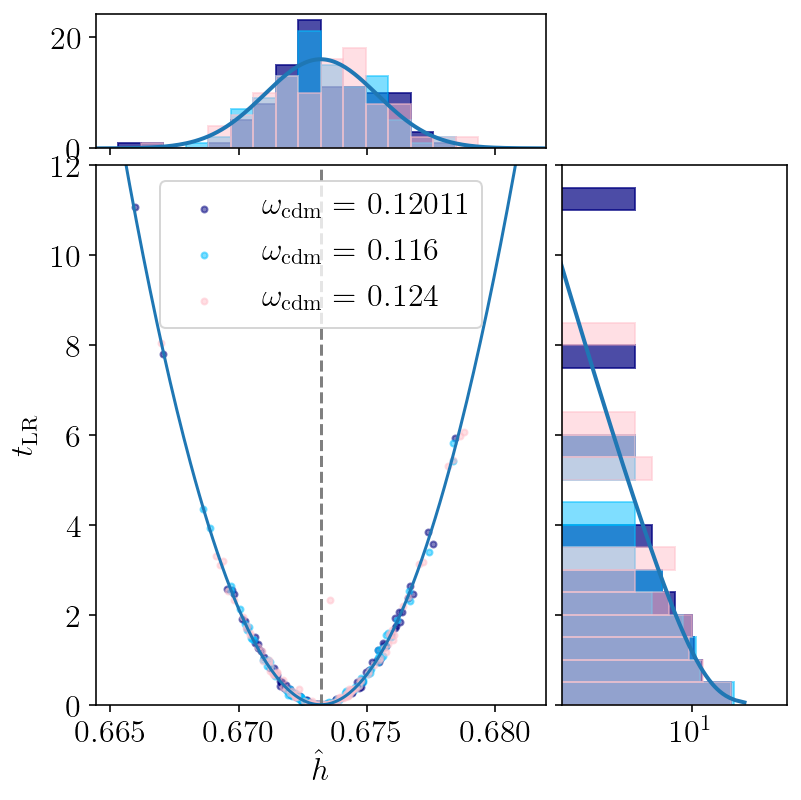

In [8]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(x_hat_0, LR0, color="navy", marker=".", alpha=0.5, label=r"$\omega_\mathrm{cdm} =$ "+str(omega_0))
ax.scatter(x_hat_1, LR1, color="deepskyblue", marker=".", alpha=0.5, label=r"$\omega_\mathrm{cdm} =$ "+str(omega_1))
ax.scatter(x_hat_2, LR2, color="pink", marker=".", alpha=0.5, label=r"$\omega_\mathrm{cdm} =$ "+str(omega_2))

ax.plot(x_bins_fine, (x_bins_fine-x_true)**2/sigma_asimov**2, color='tab:blue', ls='-') #, zorder=-1.0)
ax.vlines(x_true, 0, bin_max, ls="--", color="grey")
ax.set_xlim([x_true-x_lim, x_true+x_lim])
ax.set_ylim([0,bin_max])
ax.set_xlabel(xname_hat)
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x
ax_histx.hist(x_hat_0, bins=x_bins, color="navy", alpha=0.7, edgecolor='navy')
ax_histx.hist(x_hat_1, bins=x_bins, color="deepskyblue", alpha=0.5, edgecolor='deepskyblue')
ax_histx.hist(x_hat_2, bins=x_bins, color="pink", alpha=0.5, edgecolor='pink')
ax_histx.plot(x_bins_fine, norm_x*Gauss.pdf(x_bins_fine, loc=x_true, scale=sigma_asimov), color='tab:blue', lw=2)

# Hist y
ax_histy.hist(LR0, bins=bins, orientation='horizontal', color="navy", alpha=0.7, edgecolor='navy')
ax_histy.hist(LR1, bins=bins, orientation='horizontal', color="deepskyblue", alpha=0.5, edgecolor='deepskyblue')
ax_histy.hist(LR2, bins=bins, orientation='horizontal', color="pink", alpha=0.5, edgecolor='pink')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='tab:blue', lw=2)
ax_histy.set_xlim([5e-2,5e2])
ax_histy.set_xscale("log")

plt.savefig("LR_hist_varying_wcdm_h.pdf", format="PDF", bbox_inches='tight')
plt.show()

In [34]:
# Find \Delta\chi^2 for which 68% of mocks are below
LR = np.array([LR0, LR1, LR2]).flatten()
LR_cutoff = 1.
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

67.66666666666667 % of mocks below:  1.0


In [37]:
# Find \Delta\chi^2 for which 95% of mocks are below
LR_cutoff = 3.5
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

95.33333333333333 % of mocks below:  3.5


In [40]:
# Compare sigma_asimov and sigma_mocks:
x_hat = np.array([x_hat_0, x_hat_1, x_hat_2]).flatten()
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(x_hat))

sigma_asimov:  0.002188637276031802
sigma_mocks:  0.0021240426268054405
